# DT

In [1]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_random.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 81]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)

# DTの実行
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import numpy as np
fold=StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
max_depths=np.arange(1, 101, 1)
five_min_samples_leaf=np.arange(1, 6, 1)
model_for_cross_val_predict=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_val_predict, {'max_depth':max_depths, 'min_samples_leaf': five_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depth=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']

model=DecisionTreeClassifier(max_depth=optimal_depth, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)
print(f"最適な深さ: {optimal_depth}")
print(f"最適な最小サンプル数: {optimal_samples}")

importance=pd.DataFrame(model.feature_importances_)
importance.columns=['importance']
importance.index=x.columns
display(importance)

# クラスの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

phase=list(set(y))
phase.sort()
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase) 
display(confusion_matrix_train)
print(metrics.accuracy_score(y_train, estimated_y_train))
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase) 
display(confusion_matrix_test)
print(metrics.accuracy_score(y_test, estimated_y_test))

# 決定木の可視化
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_dt_rdkit_random', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_dt_rdkit_random'
決定木=Source.from_file(dot_file_path)
決定木.view()

# 保存
confusion_matrix_train.to_csv('confusion_matrix_train_dt_rdkit_random.csv')
confusion_matrix_train.to_excel('confusion_matrix_train_dt_rdkit_random.xlsx')
confusion_matrix_test.to_csv('confusion_matrix_test_dt_rdkit_random.csv')
confusion_matrix_test.to_excel('confusion_matrix_test_dt_rdkit_random.xlsx')
importance.to_csv('importances_dt_rdkit_random.csv')
importance.to_excel('importances_dt_rdkit_random.xlsx')

最適な深さ: 1
最適な最小サンプル数: 1


,importance
Al / Si_random,0.0
Na / Si_random,0.0
F / Si_random,0.0
H2O / Si_random,0.0
sda1 / Si_random,0.0
...,...
fr_Ndealkylation2_random,0.0
fr_bicyclic_random,0.0
fr_piperdine_random,0.0
fr_quatN_random,0.0


,*-ITN,*-SVY,*BEA,*MRE,*STO,-SVR,ABW,AEI,AFX,ANA,...,RTH,RUT,SOD,STF,STI,STT,SZR,TON,TON/MTT,TUN
*-ITN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*-SVY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*BEA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*MRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*STO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SZR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TON/MTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0.18739352640545145


,*-ITN,*-SVY,*BEA,*MRE,*STO,-SVR,ABW,AEI,AFX,ANA,...,RTH,RUT,SOD,STF,STI,STT,SZR,TON,TON/MTT,TUN
*-ITN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*-SVY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*BEA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*MRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*STO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SZR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TON/MTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0.18723404255319148


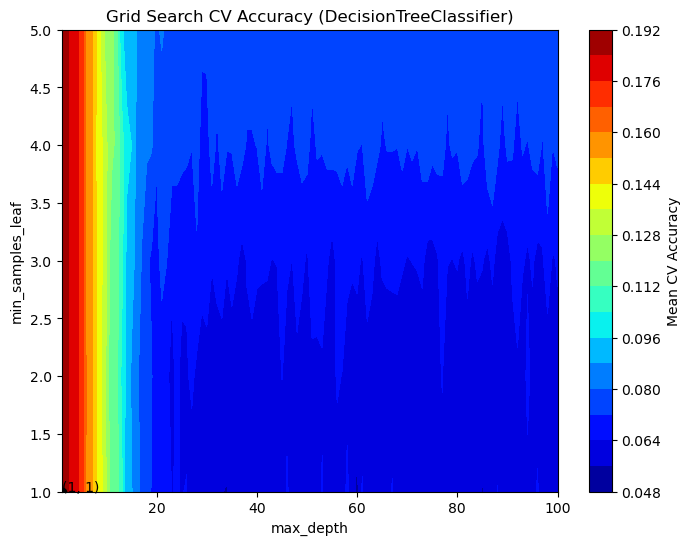

In [2]:
# クロスバリデーションの可視化
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier)')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# RF

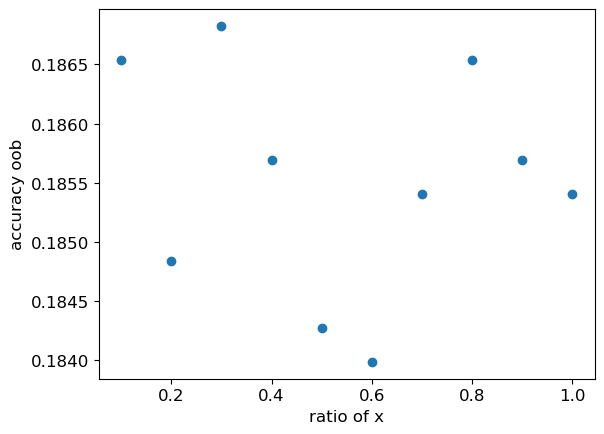

最適なx: 0.30000000000000004


,importance
Al / Si_random,0.013173
Na / Si_random,0.013037
F / Si_random,0.012729
H2O / Si_random,0.012874
sda1 / Si_random,0.013076
...,...
fr_Ndealkylation2_random,0.012768
fr_bicyclic_random,0.012856
fr_piperdine_random,0.013172
fr_quatN_random,0.013396


,*-ITN,*-SVY,*BEA,*MRE,*STO,-SVR,ABW,AEI,AFX,ANA,...,RTH,RUT,SOD,STF,STI,STT,SZR,TON,TON/MTT,TUN
*-ITN,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*-SVY,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*BEA,0,0,294,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*MRE,0,0,0,53,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*STO,0,0,0,0,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
SZR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,0,0,0
TON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,164,0,0
TON/MTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,0


1.0


,*-ITN,*-SVY,*BEA,*MRE,*STO,-SVR,ABW,AEI,AFX,ANA,...,RTH,RUT,SOD,STF,STI,STT,SZR,TON,TON/MTT,TUN
*-ITN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*-SVY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*BEA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*MRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*STO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SZR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TON/MTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0.18723404255319148


In [3]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_random.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 81]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)

# RFの実行
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, oob_score=True, max_features=ratio_of_x, random_state=99)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=12
plt.scatter(all_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, oob_score=True, max_features=optimal_x, random_state=99)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.columns=['importance']
importance.index=x.columns
display(importance)

# クラスの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

phase=list(set(y))
phase.sort()
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase) 
display(confusion_matrix_train)
print(metrics.accuracy_score(y_train, estimated_y_train))
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase) 
display(confusion_matrix_test)
print(metrics.accuracy_score(y_test, estimated_y_test))

# 保存
confusion_matrix_train.to_csv('confusion_matrix_train_rf_rdkit_random.csv')
confusion_matrix_train.to_excel('confusion_matrix_train_rf_rdkit_random.xlsx')
confusion_matrix_test.to_csv('confusion_matrix_test_rf_rdkit_random.csv')
confusion_matrix_test.to_excel('confusion_matrix_test_rf_rdkit_random.xlsx')
importance.to_csv('importances_rf_rdkit_random.csv')
importance.to_excel('importances_rf_rdkit_random.xlsx')

# XGB

In [ ]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_random.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 81]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)

# XGBの実行
import xgboost as xgb
model=xgb.XGBClassifier(importance_type='weight')
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.columns=['importance']
importance.index=x.columns
importance

# クラスの予測
estimated_y_train=model.predict(x_train)
estimated_y_test=model.predict(x_test)
phase=list(set(y))
phase.sort()
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=phase, columns=phase)
print(metrics.accuracy_score(y_train_encoded, estimated_y_train))
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=phase, columns=phase)
print(metrics.accuracy_score(y_test_encoded, estimated_y_test))
display(confusion_matrix_test)

# 保存
confusion_matrix_train.to_csv('confusion_matrix_train_xgb_rdkit_random.csv')
confusion_matrix_train.to_excel('confusion_matrix_train_xgb_rdkit_random.xlsx')
confusion_matrix_test.to_csv('confusion_matrix_test_xgb_rdkit_random.csv')
confusion_matrix_test.to_excel('confusion_matrix_test_xgb_rdkit_random.xlsx')
importance.to_csv('importances_xgb_rdkit_random.csv')
importance.to_excel('importances_xgb_rdkit_random.xlsx')

# LGBM

In [ ]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_random.csv', index_col=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 81]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, stratify=y, shuffle=True, random_state=4)
fraction_of_validation_samples=0.2
number_of_sub_models=500
x_train_tmp, x_validation, y_train_tmp, y_validation=train_test_split(x_train, y_train, test_size=fraction_of_validation_samples, random_state=4)

# LGBMの実行
import lightgbm as lgbm
model=lgbm.LGBMClassifier(n_estimators=1000)
model.fit(x_train_tmp, y_train_tmp, eval_set=(x_validation, y_validation), eval_metric='logloss', early_stopping_rounds=100)
best_n_estimators_in_cv=model.booster_.best_iteration
best_n_estimators_in_cv

def objective(trial):
        param = {
            #            'objective': 'multiclass',
            #            'metric': 'multi_logloss',
            'verbosity': 0,
            'boosting_type': trial.suggest_categorical('boosting', ['gbdt', 'dart', 'goss']),
            'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0)
        }

        if param['boosting_type'] == 'dart':
            param['drop_rate'] = trial.suggest_loguniform('drop_rate', 1e-8, 1.0)
            param['skip_drop'] = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)
        if param['boosting_type'] == 'goss':
            param['top_rate'] = trial.suggest_uniform('top_rate', 0.0, 1.0)
            param['other_rate'] = trial.suggest_uniform('other_rate', 0.0, 1.0 - param['top_rate'])

        model = lgbm.LGBMClassifier(**param, n_estimators=best_n_estimators_in_cv)
        estimated_y_in_cv = model_selection.cross_val_predict(model, x_train, y_train, cv=2)
        accuracy = metrics.accuracy_score(y_train, estimated_y_in_cv)
        return 1.0 - accuracy


import optuna
from sklearn import model_selection
from sklearn import metrics
study = optuna.create_study()
study.optimize(objective, n_trials=100)
if fraction_of_validation_samples == 0:
    best_n_estimators = number_of_sub_models
else:
    model = lgbm.LGBMClassifier(**study.best_params, n_estimators=1000)
    model.fit(x_train_tmp, y_train_tmp, eval_set=(x_validation, y_validation),eval_metric='logloss', early_stopping_rounds=100)
    best_n_estimators = model.best_iteration_
    model = lgbm.LGBMClassifier(**study.best_params, n_estimators=best_n_estimators)

model.fit(x_train, y_train)

In [ ]:
# クラスの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

phase=list(set(y))
phase.sort()
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase) 
display(confusion_matrix_train)
print(metrics.accuracy_score(y_train, estimated_y_train))
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase) 
display(confusion_matrix_test)
print(metrics.accuracy_score(y_test, estimated_y_test))

# 保存
confusion_matrix_train.to_csv('confusion_matrix_train_lgbm_rdkit_random.csv')
confusion_matrix_train.to_excel('confusion_matrix_train_lgbm_rdkit_random.xlsx')
confusion_matrix_test.to_csv('confusion_matrix_test_lgbm_rdkit_random.csv')
confusion_matrix_test.to_excel('confusion_matrix_test_lgbm_rdkit_random.xlsx')
importance.to_csv('importances_lgbm_rdkit_random.csv')
importance.to_excel('importances_lgbm_rdkit_random.xlsx')